# Data Cleaning and EDA

## 1) Data Cleaning

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

### The Data

In [2]:
# import data
df = pd.read_csv("olx_mercedes_concat.csv")
df.head()

,Unnamed: 0,Title,Link,Price,Merek,Varian,Model,Tahun,Jarak Tempuh,Tipe BBM,Warna,Transmisi,Kapasitas Mesin
0,0,Mercedes Benz c250 Amg + panoramic & sunroof ...,https://www.olx.co.id/item/mercedes-benz-c250-...,Rp 358.000.000,Mercedes-Benz,C250,C-Class,2013,50.000-55.000 km,Bensin,Putih,Automatic Triptonic,>1.500 - 2.000 cc
1,1,2018 Mercedes Benz C300 Coupe Facelift [9000 K...,https://www.olx.co.id/item/2018-mercedes-benz-...,Rp 995.000.000,Mercedes-Benz,C300,C-Class,2018,5.000-10.000 km,Bensin,Abu-abu,Automatic,>1.500 - 2.000 cc
2,2,Mercedes benz/mercy tipe W211 E260 A/T,https://www.olx.co.id/item/mercedes-benzmercy-...,Rp 118.000.000,Mercedes-Benz,E260,E-Class,2003,105.000-110.000 km,Bensin,Silver,Automatic Triptonic,>2.000 - 3.000 cc
3,3,Mercedes Benz E 300 Coupe 2018,https://www.olx.co.id/item/mercedes-benz-e-300...,Rp 1.475.000.000,Mercedes-Benz,E300,E-Class,2018,15.000-20.000 km,Bensin,Hitam,Automatic,>2.000 - 3.000 cc
4,4,Mercedes Benz C200 AT 2012,https://www.olx.co.id/item/mercedes-benz-c200-...,Rp 250.000.000,Mercedes-Benz,C200,C-Class,2012,55.000-60.000 km,Bensin,Putih,Automatic,>1.500 - 2.000 cc


In [3]:
dataFeatures = []
dataType = []
null = []
nullPCT = []
unique = []
uniqueSample = []

for item in list(df):
    dataFeatures.append(item)

for item in dataFeatures:
    dataType.append(df[item].dtype.name)
    
for item in dataFeatures:
    null.append(len(df[df[item].isnull() == True]))

for item in dataFeatures:
    nullPCT.append(round(len(df[df[item].isnull() == True])/len(df[item])*100,2))

for item in dataFeatures:
    unique.append(df[item].nunique())

for item in dataFeatures:
    uniqueSample.append(df[item].unique()[0:2])

pd.DataFrame({
    'dataFeatures' : dataFeatures,
    'dataType' : dataType,
    'null' : null,
    'nullPCT':nullPCT,
    'unique' : unique,
    'uniqueSample':uniqueSample
})

,dataFeatures,dataType,null,nullPCT,unique,uniqueSample
0,Unnamed: 0,int64,0,0.0,701,"[0, 1]"
1,Title,object,0,0.0,1379,[Mercedes Benz c250 Amg + panoramic & sunroof ...
2,Link,object,0,0.0,1446,[https://www.olx.co.id/item/mercedes-benz-c250...
3,Price,object,0,0.0,421,"[Rp 358.000.000, Rp 995.000.000]"
4,Merek,object,0,0.0,5,"[Mercedes-Benz, Truk]"
5,Varian,object,0,0.0,79,"[C250, C300]"
6,Model,object,0,0.0,37,"[C-Class, E-Class]"
7,Tahun,object,0,0.0,36,"[2013, 2018]"
8,Jarak Tempuh,object,0,0.0,52,"[50.000-55.000 km, 5.000-10.000 km]"
9,Tipe BBM,object,0,0.0,3,"[Bensin, Diesel]"


**Several things that I got from the table :**
1. There are no nan values in our data
2. There is an insight from "Merek" columns, it included other things which is not mercedes benz (look unique 'Merek')
3. "Price" columns has currency sign that need to be removed
4. "Jarak Tempuh" has too many unique. I will change the range from 5000km to 10000km.
5. There are several columns that will need to be removed (not necessary for next proces) 
6. "Link" columns has 1446 unique from 1446 rows. It means that there's no duplicated items from olx. Each link represent different item.

### Merek Columns

In [4]:
# check items which are not Mercedes Benz

df[df['Merek'] != 'Mercedes-Benz']

,Unnamed: 0,Title,Link,Price,Merek,Varian,Model,Tahun,Jarak Tempuh,Tipe BBM,Warna,Transmisi,Kapasitas Mesin
876,386,Mercedes Benz MB-800 Turbo th.2002 Car Carier ...,https://www.olx.co.id/item/mercedes-benz-mb-80...,Rp 150.000.000,Truk,Lain-lain,Mercedes-benz,2002,100.000-105.000 km,Diesel,Putih,Manual,>3.000 cc
939,476,Bus Mercedes Benz OF 917 siap pakai,https://www.olx.co.id/item/bus-mercedes-benz-o...,Rp 710.000.000,Bus,Lain-lain,Mercedes-benz,2017,100.000-105.000 km,Diesel,Hijau,Manual,>3.000 cc
1037,244,"BMW 320i Sport 2016, Istimewa, BMW 320i 2016, ...",https://www.olx.co.id/item/bmw-320i-sport-2016...,Rp 485.000.000,BMW,320i Sport,Serie 3,2016,40.000-45.000 km,Bensin,Putih,Automatic Triptonic,>1.500 - 2.000 cc
1323,261,Mercedes Benz Mini 280 Tahun 1978 AT,https://www.olx.co.id/item/mercedes-benz-mini-...,Rp 150.000.000,Klasik dan Antik,Lain-lain,Klasik dan Antik,<1986,25.000-30.000 km,Bensin,Hijau,Automatic,>2.000 - 3.000 cc


> I will remove this 4 items from the data, because mercedes benz bus and truck have so many types but I the data only has one from each of them. I think it will not relevant if we put to the model. There is also bmw and antik that will need to be removed.

In [5]:
df = df[df['Merek'] == 'Mercedes-Benz']

### Price Column
I will remove currency sign (Rp) and remove unnecessary sign, then change the type to "int"

In [6]:
df['Price'] = df['Price'].apply(lambda x: x.replace('Rp','').replace(' ','').replace('.',''))
df['Price'] = df['Price'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1442 entries, 0 to 1445
Data columns (total 13 columns):
Unnamed: 0         1442 non-null int64
Title              1442 non-null object
Link               1442 non-null object
Price              1442 non-null int64
Merek              1442 non-null object
Varian             1442 non-null object
Model              1442 non-null object
Tahun              1442 non-null object
Jarak Tempuh       1442 non-null object
Tipe BBM           1442 non-null object
Warna              1442 non-null object
Transmisi          1442 non-null object
Kapasitas Mesin    1442 non-null object
dtypes: int64(2), object(11)
memory usage: 157.7+ KB


In [7]:
df.head()

,Unnamed: 0,Title,Link,Price,Merek,Varian,Model,Tahun,Jarak Tempuh,Tipe BBM,Warna,Transmisi,Kapasitas Mesin
0,0,Mercedes Benz c250 Amg + panoramic & sunroof ...,https://www.olx.co.id/item/mercedes-benz-c250-...,358000000,Mercedes-Benz,C250,C-Class,2013,50.000-55.000 km,Bensin,Putih,Automatic Triptonic,>1.500 - 2.000 cc
1,1,2018 Mercedes Benz C300 Coupe Facelift [9000 K...,https://www.olx.co.id/item/2018-mercedes-benz-...,995000000,Mercedes-Benz,C300,C-Class,2018,5.000-10.000 km,Bensin,Abu-abu,Automatic,>1.500 - 2.000 cc
2,2,Mercedes benz/mercy tipe W211 E260 A/T,https://www.olx.co.id/item/mercedes-benzmercy-...,118000000,Mercedes-Benz,E260,E-Class,2003,105.000-110.000 km,Bensin,Silver,Automatic Triptonic,>2.000 - 3.000 cc
3,3,Mercedes Benz E 300 Coupe 2018,https://www.olx.co.id/item/mercedes-benz-e-300...,1475000000,Mercedes-Benz,E300,E-Class,2018,15.000-20.000 km,Bensin,Hitam,Automatic,>2.000 - 3.000 cc
4,4,Mercedes Benz C200 AT 2012,https://www.olx.co.id/item/mercedes-benz-c200-...,250000000,Mercedes-Benz,C200,C-Class,2012,55.000-60.000 km,Bensin,Putih,Automatic,>1.500 - 2.000 cc


### Jarak Tempuh Columns

I will change jarak tempuh scale from 5000km to 10000km. Because I think, it is still relevant for car price in that range.

In [8]:
df['Jarak Tempuh'].value_counts()

15.000-20.000 km      122
5.000-10.000 km        95
25.000-30.000 km       85
10.000-15.000 km       80
0-5.000 km             78
20.000-25.000 km       71
30.000-35.000 km       67
35.000-40.000 km       65
40.000-45.000 km       54
70.000-75.000 km       49
50.000-55.000 km       48
55.000-60.000 km       47
100.000-105.000 km     47
80.000-85.000 km       45
95.000-100.000 km      44
45.000-50.000 km       40
60.000-65.000 km       40
65.000-70.000 km       35
75.000-80.000 km       34
110.000-115.000 km     32
90.000-95.000 km       31
85.000-90.000 km       26
105.000-110.000 km     23
120.000-125.000 km     22
115.000-120.000 km     16
125.000-130.000 km     15
150.000-155.000 km     14
155.000-160.000 km     12
130.000-135.000 km     12
140.000-145.000 km     11
200.000-205.000 km      9
190.000-195.000 km      8
145.000-150.000 km      8
135.000-140.000 km      7
170.000-175.000 km      6
180.000-185.000 km      6
160.000-165.000 km      6
175.000-180.000 km      6
185.000-190.

> for 'Jarak Tempuh" more than 200000km will be classified to >200000km

In [9]:
def change_km (x):
    if (x == '0-5.000 km') | (x == '5.000-10.000 km'):
        return '0-10.000 km'
    elif (x == '10.000-15.000 km') | (x == '15.000-20.000 km'):
        return '10.000-20.000 km'
    elif (x == '20.000-25.000 km') | (x == '25.000-30.000 km'):
        return '20.000-30.000 km'
    elif (x == '30.000-35.000 km') | (x == '35.000-40.000 km'):
        return '30.000-40.000 km'
    elif (x == '40.000-45.000 km') | (x == '45.000-50.000 km'):
        return '40.000-50.000 km'
    elif (x == '50.000-55.000 km') | (x == '55.000-60.000 km'):
        return '50.000-60.000 km'
    elif (x == '60.000-65.000 km') | (x == '65.000-70.000 km'):
        return '60.000-70.000 km'
    elif (x == '70.000-75.000 km') | (x == '75.000-80.000 km'):
        return '70.000-80.000 km'
    elif (x == '80.000-85.000 km') | (x == '85.000-90.000 km'):
        return '80.000-90.000 km'
    elif (x == '90.000-95.000 km') | (x == '95.000-100.000 km'):
        return '90.000-100.000 km'
    elif (x == '100.000-105.000 km') | (x == '105.000-110.000 km'):
        return '100.000-110.000 km'
    elif (x == '110.000-115.000 km') | (x == '115.000-120.000 km'):
        return '110.000-120.000 km'
    elif (x == '120.000-125.000 km') | (x == '125.000-130.000 km'):
        return '120.000-130.000 km'
    elif (x == '130.000-135.000 km') | (x == '135.000-140.000 km'):
        return '130.000-140.000 km'
    elif (x == '140.000-145.000 km') | (x == '145.000-150.000 km'):
        return '140.000-150.000 km'
    elif (x == '150.000-155.000 km') | (x == '155.000-160.000 km'):
        return '150.000-160.000 km'
    elif (x == '160.000-165.000 km') | (x == '165.000-170.000 km'):
        return '160.000-170.000 km'
    elif (x == '170.000-175.000 km') | (x == '175.000-180.000 km'):
        return '170.000-180.000 km'
    elif (x == '180.000-185.000 km') | (x == '185.000-190.000 km'):
        return '180.000-190.000 km'
    elif (x == '190.000-195.000 km') | (x == '195.000-200.000 km'):
        return '190.000-200.000 km'
    else:
        return '>200.000 km'

df['Jarak Tempuh'] = df['Jarak Tempuh'].apply(lambda x : change_km(x))

In [10]:
df['Jarak Tempuh'].value_counts()

10.000-20.000 km      202
0-10.000 km           173
20.000-30.000 km      156
30.000-40.000 km      132
50.000-60.000 km       95
40.000-50.000 km       94
70.000-80.000 km       83
90.000-100.000 km      75
60.000-70.000 km       75
80.000-90.000 km       71
100.000-110.000 km     70
110.000-120.000 km     48
120.000-130.000 km     37
>200.000 km            27
150.000-160.000 km     26
140.000-150.000 km     19
130.000-140.000 km     19
170.000-180.000 km     12
180.000-190.000 km     11
190.000-200.000 km      9
160.000-170.000 km      8
Name: Jarak Tempuh, dtype: int64

### Drop Columns

I will drop "Unnamed: 0" column because it's old index and I don't need this columns, and I will drop "Link","Title", and "Merek" columns too because they will not usefull for the next processes.

In [11]:
df.drop(['Unnamed: 0','Link','Title','Merek'],axis=1,inplace=True)
df

,Price,Varian,Model,Tahun,Jarak Tempuh,Tipe BBM,Warna,Transmisi,Kapasitas Mesin
0,358000000,C250,C-Class,2013,50.000-60.000 km,Bensin,Putih,Automatic Triptonic,>1.500 - 2.000 cc
1,995000000,C300,C-Class,2018,0-10.000 km,Bensin,Abu-abu,Automatic,>1.500 - 2.000 cc
2,118000000,E260,E-Class,2003,100.000-110.000 km,Bensin,Silver,Automatic Triptonic,>2.000 - 3.000 cc
3,1475000000,E300,E-Class,2018,10.000-20.000 km,Bensin,Hitam,Automatic,>2.000 - 3.000 cc
4,250000000,C200,C-Class,2012,50.000-60.000 km,Bensin,Putih,Automatic,>1.500 - 2.000 cc
...,...,...,...,...,...,...,...,...,...
1441,179000000,C200,C-Class,2009,50.000-60.000 km,Bensin,Hitam,Automatic,>1.500 - 2.000 cc
1442,295000000,C200,C-Class,2014,30.000-40.000 km,Bensin,Hitam,Automatic Triptonic,>1.500 - 2.000 cc
1443,88000000,C180,C-Class,1994,150.000-160.000 km,Bensin,Silver,Manual,>1.500 - 2.000 cc
1444,137000000,E260,E-Class,2005,80.000-90.000 km,Bensin,Hitam,Automatic Triptonic,>2.000 - 3.000 cc


### Varian and Model Columns

In [12]:
# check unique varian
sorted(list(df['Varian'].unique()))

['A140',
 'A150',
 'A200',
 'A250',
 'B170',
 'B180',
 'B200',
 'C180',
 'C200',
 'C200K',
 'C230',
 'C230 K',
 'C240',
 'C250',
 'C280',
 'C300',
 'C320',
 'C63 6.2 AMG',
 'CLA200',
 'CLA45 AMG',
 'CLC200',
 'CLK240',
 'CLS350',
 'CLS400',
 'CLS63 5.5 AMG',
 'CLS63 AMG',
 'E200',
 'E200K',
 'E220',
 'E230',
 'E240',
 'E250',
 'E260',
 'E280',
 'E300',
 'E320',
 'E350',
 'E400',
 'E500',
 'E55',
 'G300',
 'G55 AMG',
 'GL350',
 'GL400',
 'GL500',
 'GLA200',
 'GLA45 AMG',
 'GLC250',
 'GLC300',
 'GLE250D',
 'GLE400',
 'GLE43 AMG',
 'Lain-lain',
 'ML250',
 'ML270',
 'ML320',
 'ML350',
 'ML400',
 'New GLS 400 AMG Line',
 'R300L',
 'S280',
 'S300 L',
 'S320',
 'S350',
 'S350 L',
 'S400',
 'S400 L',
 'S500',
 'S500 L',
 'S600 L',
 'SL350',
 'SLC200',
 'SLK200',
 'SLK200K',
 'SLK230K',
 'SLK250',
 'SLK350',
 'V220']

> There is a varian that labeled as 'Lain-Lain'. We need to check it first.

In [13]:
# check unique model
sorted(list(df['Model'].unique()))

['A-Class',
 'AMG GT',
 'B-Class',
 'C-Class',
 'CLA-Class',
 'CLC-Class',
 'CLK',
 'CLK-Class',
 'CLS',
 'CLS 350',
 'CLS-Class',
 'E-Class',
 'G-Class',
 'GE-Class',
 'GL-Class',
 'GLA-Class',
 'GLC-Class',
 'GLE-Class',
 'GLS-Class',
 'Lain-lain',
 'Lainnya',
 'M-Class',
 'ML 350',
 'ML-Class',
 'R-Class',
 'S-Class',
 'SL',
 'SL-Class',
 'SLC-Class',
 'SLK',
 'SLK-Class',
 'Tiger',
 'V-Class',
 'Vito']

- We have some "lain-lain" and "lainnya" data at columns model.
- We have model which are very close "SLK"&"SLK-Class","SL"&"SL-Class", etc..
- I have assumption there is an wrong input from user when sell their car

In [14]:
# cehck varian = 'Lain-lain'
df[df['Varian'] == "Lain-lain"]

,Price,Varian,Model,Tahun,Jarak Tempuh,Tipe BBM,Warna,Transmisi,Kapasitas Mesin
11,1325000000,Lain-lain,GL-Class,2018,0-10.000 km,Bensin,Hitam,Automatic Triptonic,>3.000 cc
13,1650000000,Lain-lain,CLS 350,2019,0-10.000 km,Bensin,Putih,Automatic Triptonic,>1.500 - 2.000 cc
17,415000000,Lain-lain,GE-Class,1987,120.000-130.000 km,Diesel,Coklat,Automatic,>2.000 - 3.000 cc
54,645000000,Lain-lain,ML 350,2015,10.000-20.000 km,Bensin,Putih,Automatic,>2.000 - 3.000 cc
55,575000000,Lain-lain,SLK,2013,20.000-30.000 km,Bensin,Merah,Automatic Triptonic,>2.000 - 3.000 cc
...,...,...,...,...,...,...,...,...,...
1363,460000000,Lain-lain,SLK,2011,10.000-20.000 km,Bensin,Putih,Automatic Triptonic,>1.500 - 2.000 cc
1373,560000000,Lain-lain,SLK,2011,20.000-30.000 km,Bensin,Merah,Automatic Triptonic,>1.500 - 2.000 cc
1389,775000000,Lain-lain,GLC-Class,2018,30.000-40.000 km,Bensin,Hitam,Automatic,>1.500 - 2.000 cc
1403,57000000,Lain-lain,Tiger,<1986,170.000-180.000 km,Bensin,Hijau,Manual,>2.000 - 3.000 cc


In [15]:
# Check model = "Lain-lain"
df[df['Model'] == "Lain-lain"]

,Price,Varian,Model,Tahun,Jarak Tempuh,Tipe BBM,Warna,Transmisi,Kapasitas Mesin
104,1450000000,Lain-lain,Lain-lain,2018,0-10.000 km,Bensin,Putih,Automatic,>2.000 - 3.000 cc
315,330000000,Lain-lain,Lain-lain,<1986,80.000-90.000 km,Bensin,Biru,Manual,>1.500 - 2.000 cc
316,330000000,Lain-lain,Lain-lain,<1986,80.000-90.000 km,Bensin,Biru,Manual,>1.500 - 2.000 cc
433,750000000,Lain-lain,Lain-lain,<1986,0-10.000 km,Diesel,Hijau,Manual,>3.000 cc
462,52000000,Lain-lain,Lain-lain,1991,>200.000 km,Bensin,Silver,Manual,>2.000 - 3.000 cc
601,278000000,Lain-lain,Lain-lain,<1986,150.000-160.000 km,Bensin,Hitam,Manual,>2.000 - 3.000 cc
617,215000000,Lain-lain,Lain-lain,2004,90.000-100.000 km,Bensin,Hitam,Automatic,>2.000 - 3.000 cc
821,750000000,Lain-lain,Lain-lain,2014,>200.000 km,Diesel,Silver,Manual,>2.000 - 3.000 cc
850,75000000,Lain-lain,Lain-lain,<1986,150.000-160.000 km,Bensin,Hijau,Manual,>2.000 - 3.000 cc
940,1100000000,Lain-lain,Lain-lain,2017,10.000-20.000 km,Diesel,Hitam,Manual,>2.000 - 3.000 cc


In [16]:
# Check model = "Lain-lain"
df[df['Model'] == "Lainnya"]

,Price,Varian,Model,Tahun,Jarak Tempuh,Tipe BBM,Warna,Transmisi,Kapasitas Mesin
161,118000000,Lain-lain,Lainnya,1991,80.000-90.000 km,Bensin,Coklat,Automatic,>2.000 - 3.000 cc
1039,410000000,Lain-lain,Lainnya,2014,>200.000 km,Diesel,Silver,Manual,>2.000 - 3.000 cc


In [17]:
df[df['Model'] == 'SLK']

,Price,Varian,Model,Tahun,Jarak Tempuh,Tipe BBM,Warna,Transmisi,Kapasitas Mesin
55,575000000,Lain-lain,SLK,2013,20.000-30.000 km,Bensin,Merah,Automatic Triptonic,>2.000 - 3.000 cc
126,310000000,Lain-lain,SLK,2005,50.000-60.000 km,Bensin,Coklat,Automatic Triptonic,>1.500 - 2.000 cc
296,555000000,Lain-lain,SLK,2012,20.000-30.000 km,Bensin,Abu-abu,Automatic,>1.500 - 2.000 cc
706,465000000,Lain-lain,SLK,2011,30.000-40.000 km,Bensin,Abu-abu,Automatic Triptonic,>1.500 - 2.000 cc
712,575000000,Lain-lain,SLK,2013,10.000-20.000 km,Bensin,Merah,Automatic Triptonic,>1.500 - 2.000 cc
811,260000000,Lain-lain,SLK,1998,30.000-40.000 km,Bensin,Silver,Automatic,>2.000 - 3.000 cc
914,465000000,Lain-lain,SLK,2011,30.000-40.000 km,Bensin,Abu-abu,Automatic Triptonic,>1.500 - 2.000 cc
935,439000000,Lain-lain,SLK,2009,20.000-30.000 km,Bensin,Silver,Automatic Triptonic,>1.500 - 2.000 cc
1105,245000000,Lain-lain,SLK,2001,160.000-170.000 km,Bensin,Hitam,Automatic Triptonic,>2.000 - 3.000 cc
1191,275000000,Lain-lain,SLK,2000,80.000-90.000 km,Bensin,Biru,Automatic Triptonic,>2.000 - 3.000 cc


In [18]:
df[df['Model'] == 'Vito']

,Price,Varian,Model,Tahun,Jarak Tempuh,Tipe BBM,Warna,Transmisi,Kapasitas Mesin
584,85000000,Lain-lain,Vito,2001,90.000-100.000 km,Bensin,Hitam,Automatic,>2.000 - 3.000 cc


In [19]:
df[df['Model'] == 'CLK']

,Price,Varian,Model,Tahun,Jarak Tempuh,Tipe BBM,Warna,Transmisi,Kapasitas Mesin
591,300000000,Lain-lain,CLK,2003,50.000-60.000 km,Bensin,Biru,Automatic Triptonic,>3.000 cc
701,320000000,Lain-lain,CLK,2005,30.000-40.000 km,Bensin,Silver,Automatic Triptonic,>2.000 - 3.000 cc
754,320000000,Lain-lain,CLK,1999,40.000-50.000 km,Bensin,Silver,Automatic,>2.000 - 3.000 cc
1029,675000000,Lain-lain,CLK,2002,40.000-50.000 km,Bensin,Biru,Automatic,>2.000 - 3.000 cc


Insight that I got from this data:
1. All models that labeled as "Lain-lain" are labeled "Lain-lain" too at varian columns
2. Model that we expect as wrog input ("SLK"&"SLK-Class",etc), I think it's true. I may happened that user inputs model SLK (not SLK-class) so they do not find the correct varian. It happened too to others model.
3. It's very hard to fill varian based on model, because one model could have so many varian, and varian absolutely will affect the price. So, the solution that I have is to remove the varian which is labeled as "Lain-lain"

In [20]:
# remove varian lain-lain
df = df[df['Varian'] != "Lain-lain"]

print("Varian Unique")
print(sorted(list(df['Varian'].unique())))
print()
print()
print('Model Unique')
print(sorted(list(df['Model'].unique())))

Varian Unique
['A140', 'A150', 'A200', 'A250', 'B170', 'B180', 'B200', 'C180', 'C200', 'C200K', 'C230', 'C230 K', 'C240', 'C250', 'C280', 'C300', 'C320', 'C63 6.2 AMG', 'CLA200', 'CLA45 AMG', 'CLC200', 'CLK240', 'CLS350', 'CLS400', 'CLS63 5.5 AMG', 'CLS63 AMG', 'E200', 'E200K', 'E220', 'E230', 'E240', 'E250', 'E260', 'E280', 'E300', 'E320', 'E350', 'E400', 'E500', 'E55', 'G300', 'G55 AMG', 'GL350', 'GL400', 'GL500', 'GLA200', 'GLA45 AMG', 'GLC250', 'GLC300', 'GLE250D', 'GLE400', 'GLE43 AMG', 'ML250', 'ML270', 'ML320', 'ML350', 'ML400', 'New GLS 400 AMG Line', 'R300L', 'S280', 'S300 L', 'S320', 'S350', 'S350 L', 'S400', 'S400 L', 'S500', 'S500 L', 'S600 L', 'SL350', 'SLC200', 'SLK200', 'SLK200K', 'SLK230K', 'SLK250', 'SLK350', 'V220']


Model Unique
['A-Class', 'B-Class', 'C-Class', 'CLA-Class', 'CLC-Class', 'CLK-Class', 'CLS', 'CLS-Class', 'E-Class', 'G-Class', 'GL-Class', 'GLA-Class', 'GLC-Class', 'GLE-Class', 'GLS-Class', 'ML-Class', 'R-Class', 'S-Class', 'SL-Class', 'SLC-Class', 'SL

### Tahun Columns

In [21]:
df['Tahun'].unique()

array(['2013', '2018', '2003', '2012', '2008', '2014', '2016', '2011',
       '2006', '2019', '2015', '1987', '2010', '2002', '1994', '1992',
       '2009', '2007', '1999', '1996', '2004', '2020', '2017', '2001',
       '1995', '<1986', '2005', '1997', '1986', '1998', '2000', '1991',
       '1990', '1993', '1988', '1989'], dtype=object)

In [22]:
df[df['Tahun'] == '<1986']

,Price,Varian,Model,Tahun,Jarak Tempuh,Tipe BBM,Warna,Transmisi,Kapasitas Mesin
72,155000000,S280,S-Class,<1986,90.000-100.000 km,Bensin,Marun,Manual,>2.000 - 3.000 cc
206,340000000,S280,S-Class,<1986,0-10.000 km,Bensin,Merah,Manual,>2.000 - 3.000 cc
219,195000000,E280,E-Class,<1986,70.000-80.000 km,Bensin,Hitam,Automatic,>2.000 - 3.000 cc
288,35000000,E200,E-Class,<1986,150.000-160.000 km,Bensin,Merah,Manual,>1.500 - 2.000 cc
305,379000000,S280,S-Class,<1986,0-10.000 km,Bensin,Hijau,Manual,>2.000 - 3.000 cc
425,60000000,B200,B-Class,<1986,110.000-120.000 km,Bensin,Hijau,Manual,>1.500 - 2.000 cc
445,365000000,S280,S-Class,<1986,40.000-50.000 km,Bensin,Putih,Automatic,>2.000 - 3.000 cc
446,260000000,E230,E-Class,<1986,30.000-40.000 km,Bensin,Merah,Manual,>2.000 - 3.000 cc
511,25000000,E230,E-Class,<1986,60.000-70.000 km,Bensin,Hijau,Manual,>2.000 - 3.000 cc
744,50000000,C200,C-Class,<1986,140.000-150.000 km,Bensin,Silver,Manual,>1.500 - 2.000 cc


> We could see year in string format. Year will affect car price. So wee need to keep it in countinous value. I will change all year to integer, and for year <1986 will be classified as 1986

In [23]:
def change_year(x):
    if x == '<1986':
        return 1986
    else:
        return int(x)

df['Tahun'] = df['Tahun'].apply(lambda x: change_year(x))
df['Tahun'].unique()

array([2013, 2018, 2003, 2012, 2008, 2014, 2016, 2011, 2006, 2019, 2015,
       1987, 2010, 2002, 1994, 1992, 2009, 2007, 1999, 1996, 2004, 2020,
       2017, 2001, 1995, 1986, 2005, 1997, 1998, 2000, 1991, 1990, 1993,
       1988, 1989])

### Tipe BBM

In [24]:
df['Tipe BBM'].unique()

array(['Bensin', 'Diesel', 'Hybrid'], dtype=object)

> There is no problem too at Tipe BBM

### Warna Columns

In [25]:
df['Warna'].unique()

array(['Putih', 'Abu-abu', 'Silver', 'Hitam', 'Coklat', 'Hijau', 'Marun',
       'Lainnya', 'Merah', 'Biru', 'Emas', 'Ungu'], dtype=object)

In [26]:
df[df['Warna'] == "Lainnya"]

,Price,Varian,Model,Tahun,Jarak Tempuh,Tipe BBM,Warna,Transmisi,Kapasitas Mesin
86,60000000,E220,E-Class,1994,>200.000 km,Bensin,Lainnya,Manual,>2.000 - 3.000 cc
419,98500000,C230,C-Class,1993,60.000-70.000 km,Bensin,Lainnya,Automatic,>2.000 - 3.000 cc
679,75000000,C230,C-Class,1997,50.000-60.000 km,Bensin,Lainnya,Manual,>2.000 - 3.000 cc
783,67500000,E300,E-Class,1989,140.000-150.000 km,Bensin,Lainnya,Automatic,>2.000 - 3.000 cc
892,75000000,E300,E-Class,1988,10.000-20.000 km,Bensin,Lainnya,Automatic,>3.000 cc
1176,169000000,S280,S-Class,2002,60.000-70.000 km,Bensin,Lainnya,Automatic,>2.000 - 3.000 cc


In [27]:
# check car that has color which is not common
len(df[(df['Warna'] != 'Putih') & (df['Warna'] != 'Abu-abu') & (df['Warna'] != 'Silver') & (df['Warna'] != 'Hitam') &
  (df['Warna'] != 'Merah') & (df['Warna'] != 'Biru')])

50

> I will change this 50 cars to "Lainnya"

In [28]:
def change_color(x):
    if (x != "Putih") & (x != 'Abu-abu') & (x != 'Silver') & (x != 'Hitam') & (x != 'Merah') & (x != 'Biru'):
        return "Lainnya"
    else :
        return x

df['Warna'] = df['Warna'].apply(lambda x: change_color(x))
df['Warna'].value_counts()

Hitam      633
Putih      254
Silver     216
Abu-abu     98
Lainnya     50
Biru        30
Merah       27
Name: Warna, dtype: int64

### Transmisi Columns

In [29]:
df['Transmisi'].unique()

array(['Automatic Triptonic', 'Automatic', 'Manual'], dtype=object)

Notes for Transmisi : Automatic triptonic same with automatic but the driver has an option to shift the gear manually too.

> There's no problem with transmisi

### Kapasitas Mesin

In [30]:
df['Kapasitas Mesin'].unique()

array(['>1.500 - 2.000 cc', '>2.000 - 3.000 cc', '>3.000 cc',
       '>1.000 - 1.500 cc'], dtype=object)

> There's no problem with Kapasitas Mesin

**Now I have finished cleaning the data, we could check again the final data once again**

In [31]:
df

,Price,Varian,Model,Tahun,Jarak Tempuh,Tipe BBM,Warna,Transmisi,Kapasitas Mesin
0,358000000,C250,C-Class,2013,50.000-60.000 km,Bensin,Putih,Automatic Triptonic,>1.500 - 2.000 cc
1,995000000,C300,C-Class,2018,0-10.000 km,Bensin,Abu-abu,Automatic,>1.500 - 2.000 cc
2,118000000,E260,E-Class,2003,100.000-110.000 km,Bensin,Silver,Automatic Triptonic,>2.000 - 3.000 cc
3,1475000000,E300,E-Class,2018,10.000-20.000 km,Bensin,Hitam,Automatic,>2.000 - 3.000 cc
4,250000000,C200,C-Class,2012,50.000-60.000 km,Bensin,Putih,Automatic,>1.500 - 2.000 cc
...,...,...,...,...,...,...,...,...,...
1441,179000000,C200,C-Class,2009,50.000-60.000 km,Bensin,Hitam,Automatic,>1.500 - 2.000 cc
1442,295000000,C200,C-Class,2014,30.000-40.000 km,Bensin,Hitam,Automatic Triptonic,>1.500 - 2.000 cc
1443,88000000,C180,C-Class,1994,150.000-160.000 km,Bensin,Silver,Manual,>1.500 - 2.000 cc
1444,137000000,E260,E-Class,2005,80.000-90.000 km,Bensin,Hitam,Automatic Triptonic,>2.000 - 3.000 cc


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1445
Data columns (total 9 columns):
Price              1308 non-null int64
Varian             1308 non-null object
Model              1308 non-null object
Tahun              1308 non-null int64
Jarak Tempuh       1308 non-null object
Tipe BBM           1308 non-null object
Warna              1308 non-null object
Transmisi          1308 non-null object
Kapasitas Mesin    1308 non-null object
dtypes: int64(2), object(7)
memory usage: 102.2+ KB


In [33]:
dataFeatures = []
dataType = []
null = []
nullPCT = []
unique = []
uniqueSample = []

for item in list(df):
    dataFeatures.append(item)

for item in dataFeatures:
    dataType.append(df[item].dtype.name)
    
for item in dataFeatures:
    null.append(len(df[df[item].isnull() == True]))

for item in dataFeatures:
    nullPCT.append(round(len(df[df[item].isnull() == True])/len(df[item])*100,2))

for item in dataFeatures:
    unique.append(df[item].nunique())

for item in dataFeatures:
    uniqueSample.append(df[item].unique()[0:2])

pd.DataFrame({
    'dataFeatures' : dataFeatures,
    'dataType' : dataType,
    'null' : null,
    'nullPCT':nullPCT,
    'unique' : unique,
    'uniqueSample':uniqueSample
})

,dataFeatures,dataType,null,nullPCT,unique,uniqueSample
0,Price,int64,0,0.0,399,"[358000000, 995000000]"
1,Varian,object,0,0.0,77,"[C250, C300]"
2,Model,object,0,0.0,22,"[C-Class, E-Class]"
3,Tahun,int64,0,0.0,35,"[2013, 2018]"
4,Jarak Tempuh,object,0,0.0,21,"[50.000-60.000 km, 0-10.000 km]"
5,Tipe BBM,object,0,0.0,3,"[Bensin, Diesel]"
6,Warna,object,0,0.0,7,"[Putih, Abu-abu]"
7,Transmisi,object,0,0.0,3,"[Automatic Triptonic, Automatic]"
8,Kapasitas Mesin,object,0,0.0,4,"[>1.500 - 2.000 cc, >2.000 - 3.000 cc]"


## 2) Exploratory Data Analysis (EDA)

### Price Distribution

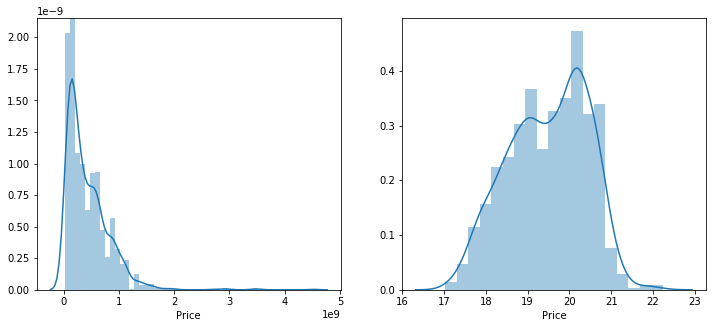

In [34]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.distplot((df['Price']))

plt.subplot(1,2,2)
sns.distplot(np.log(df['Price']))

> Looks our price has better distribution when using log.

### Varian

#### The number of varian is the most sold

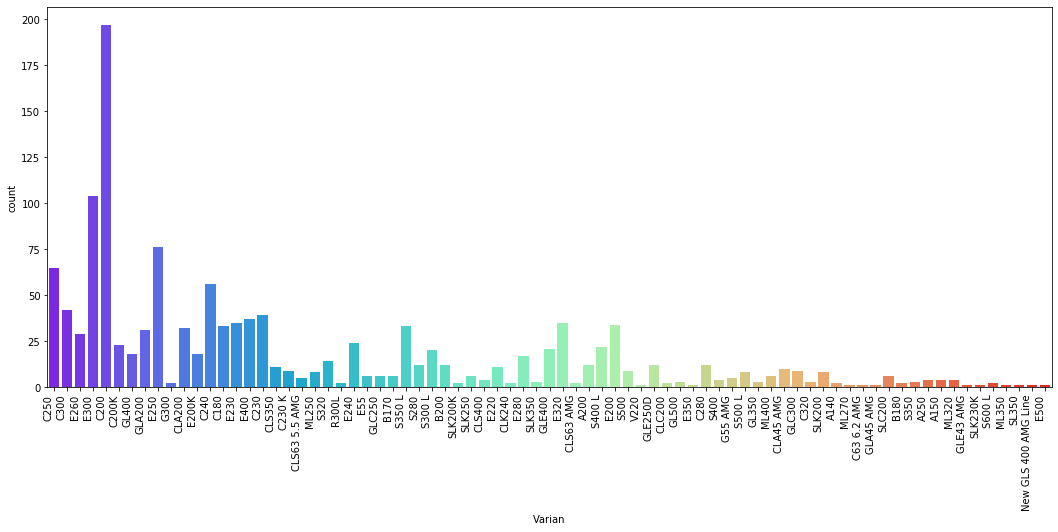

In [35]:
plt.figure(figsize=(18,7))
sns.countplot(df['Varian'],palette='rainbow')
plt.xticks(rotation=90, ha='right',fontsize=10)
plt.show()

> This plow show us and prove to me that C200 is the most favorite marcedes car in Indonesia

#### Average price based on varian

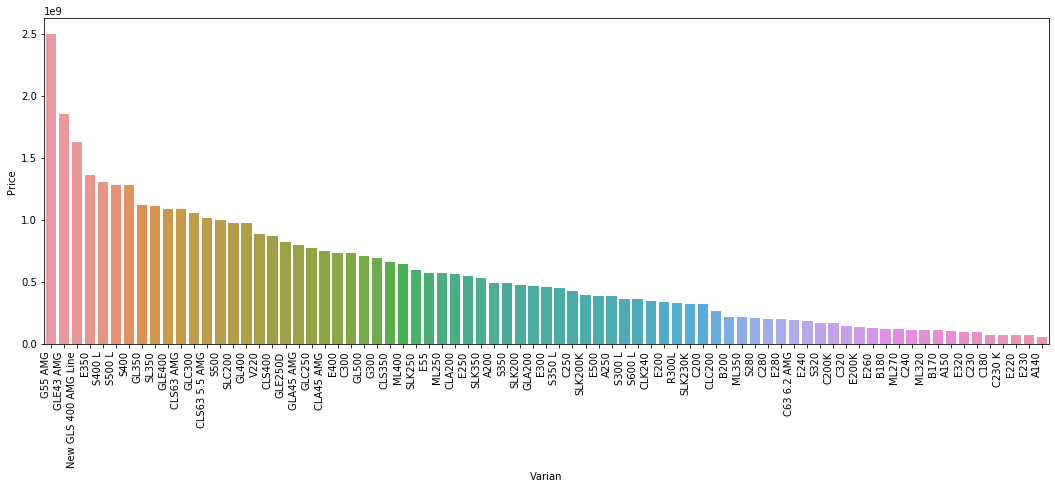

In [36]:
plt.figure(figsize=(18,6))
df_avar = df.groupby('Varian').mean()[['Price']].reset_index()
sns.barplot(data=df_avar.sort_values(by='Price',ascending=False),x='Varian',y='Price')
plt.xticks(rotation=90, ha='right',fontsize=10)
plt.show()

> It shows that mercedes varian G35 AMG is the most expensive mercedes benz car that sold at olx.co.id 

### Model

#### The number of variants is the most sold

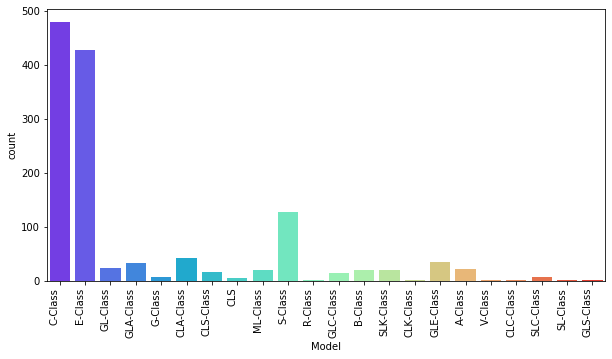

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(df['Model'],palette='rainbow')
plt.xticks(rotation=90, ha='right',fontsize=10)
plt.show()

> Because the c-class and e-class models are types of Mercedes cars that are assembled in Indonesia. A sporty and up-to-date look, and the fuel is quite economical.

#### Average price based on model

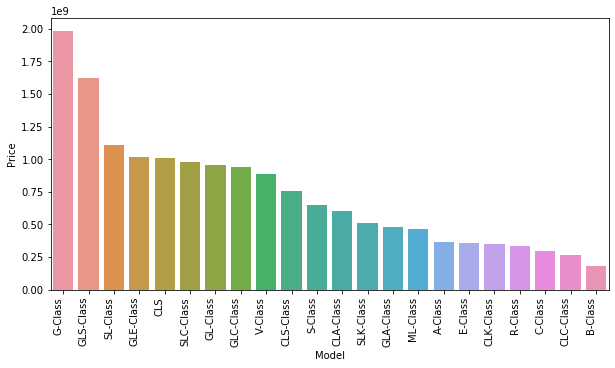

In [38]:
plt.figure(figsize=(10,5))
df_avar = df.groupby('Model').mean()[['Price']].reset_index()
sns.barplot(data=df_avar.sort_values(by='Price',ascending=False),x='Model',y='Price')
plt.xticks(rotation=90, ha='right',fontsize=10)
plt.show()

> Now I could mapping the average price based on class, that's why the C-class and E-class is the most favorite cars in Indonesia, because the price is not too much expensive.

#### Price distribution for each model

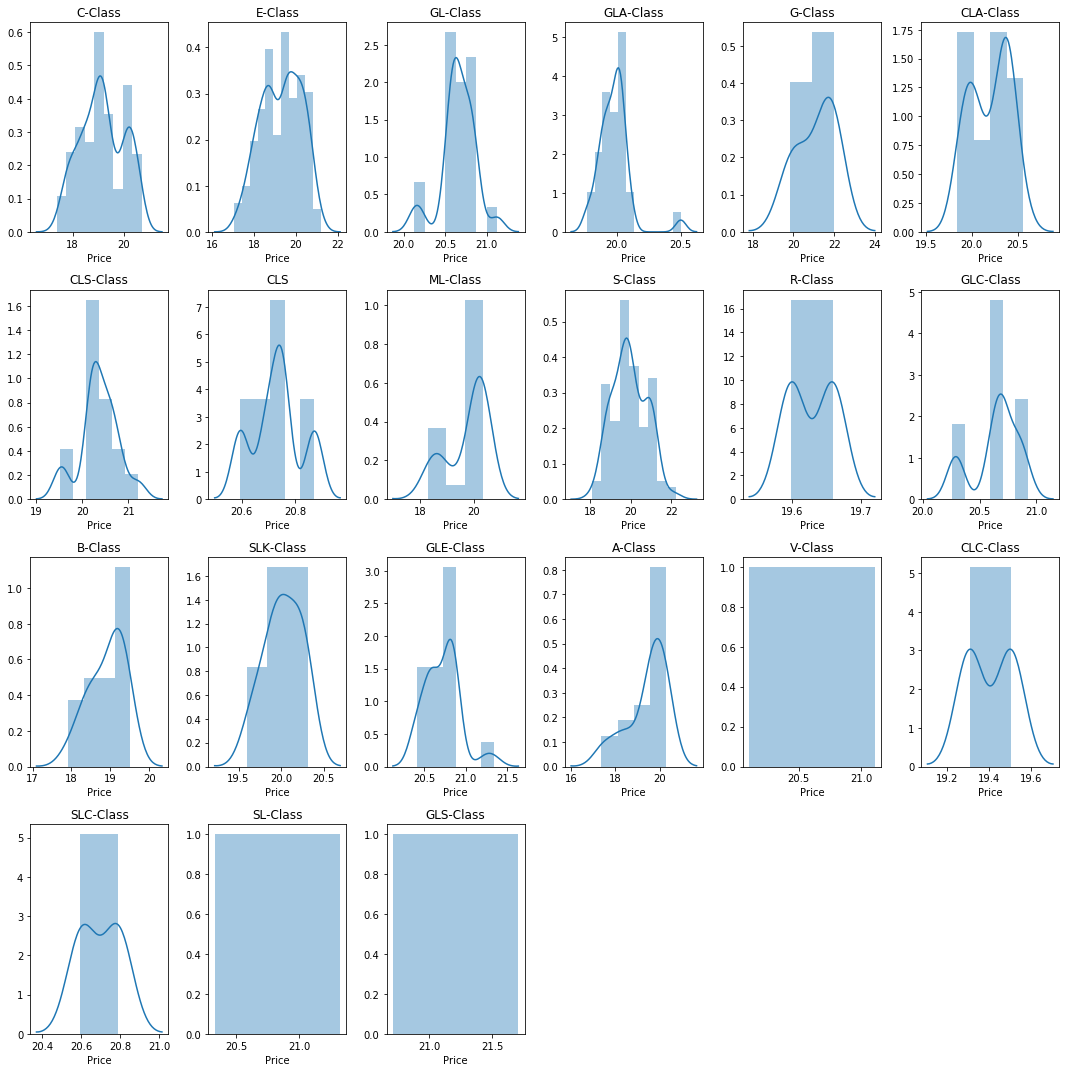

In [39]:
model_uni = list(df['Model'].unique())

plt.figure(figsize=(15,15))
i=1

for item in model_uni:
    if item != 'CLK-Class' : # because CLK-Class have the same price for both of items
        subs = df[df['Model'] == item]['Price']
        plt.subplot(4,6,i)
        sns.distplot(np.log(subs))
        plt.title(item)
        i += 1
    else:
        pass

plt.tight_layout()


> It looks like mostly our data have closely to normal distribution, there is not included CLK-Class because it's only have to data that have same price.

### Jarak Tempuh

#### The number of Jarak Tempuh is the most sold

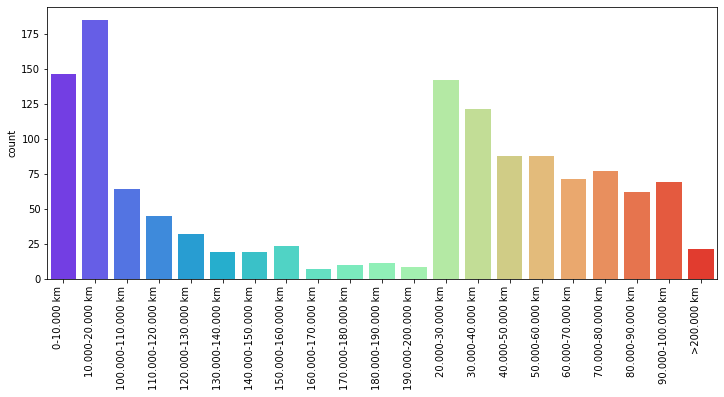

In [40]:
plt.figure(figsize=(12,5))
sns.countplot(sorted(df['Jarak Tempuh']),palette='rainbow')
plt.xticks(rotation=90, ha='right',fontsize=10)
plt.show()

> Mostly the cars dominated by range <50000km

#### Average price based on Jarak Tempuh

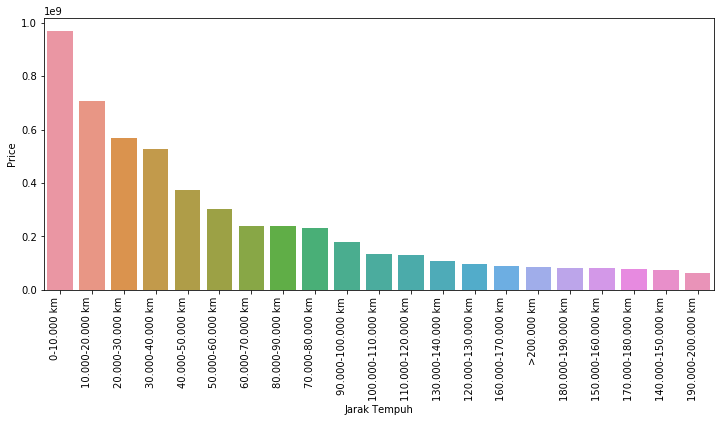

In [41]:
plt.figure(figsize=(12,5))
df_avar = df.groupby('Jarak Tempuh').mean()[['Price']].reset_index()
sns.barplot(data=df_avar.sort_values(by='Price',ascending=False),x='Jarak Tempuh',y='Price')
plt.xticks(rotation=90, ha='right',fontsize=10)
plt.show()

> It makes sense because the lower the "km" the more expensive the cars

### Most Favorite Colors

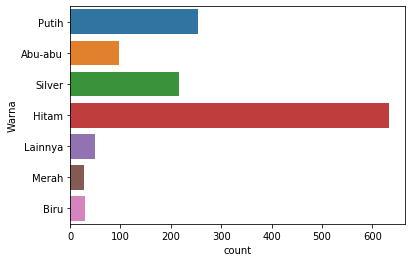

In [42]:
sns.countplot(y=df['Warna'])

> Look like "hitam" is the most favorite color for mercedes that sold in Indonesia

### Transmisi

#### Average price based on transmisi

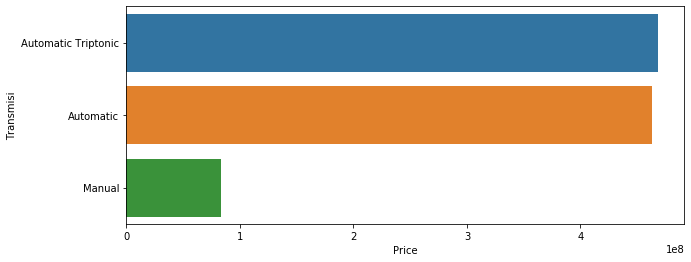

In [43]:
plt.figure(figsize=(10,4))
df_avar = df.groupby('Transmisi').mean()[['Price']].reset_index()
sns.barplot(data=df_avar.sort_values(by='Price',ascending=False),x='Price',y='Transmisi')

plt.show()

> It makes sense because manual transmision normally cheaper than automatic transmission

### Correlation Between Features

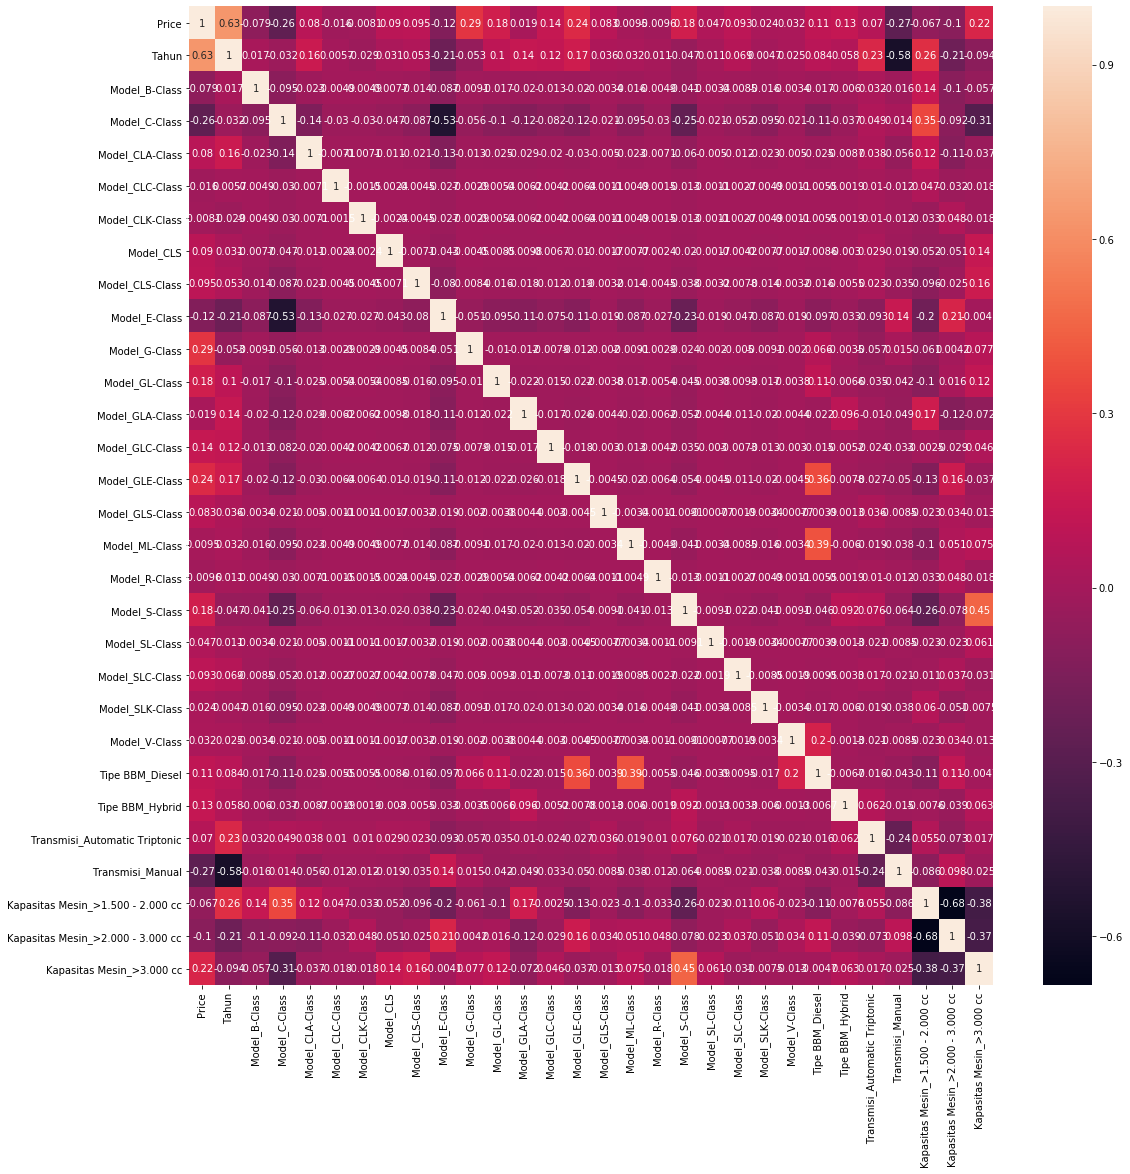

In [44]:
plt.figure(figsize=(18,18))

df_check = pd.get_dummies(df,columns=['Model','Tipe BBM','Transmisi','Kapasitas Mesin'],drop_first=True)
sns.heatmap(df_check.corr(),annot=True)

> The most correlated feature to price is 'Tahun', and it makes sense.

### Price vs Tahun

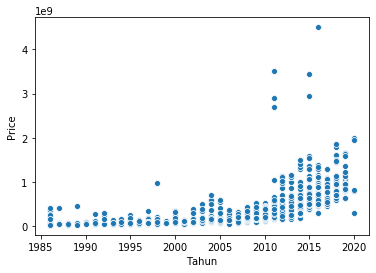

In [45]:
sns.scatterplot(data=df,x='Tahun',y='Price')

> Increasing year will increase the price of the car

### Export DataFrame for modelling

In [46]:
df.to_csv('df_model.csv')